In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

Importações das bibliotecas usadas

In [ ]:
import torch
torch.__version__

'2.0.1+cu118'

In [ ]:
import torch.nn as nn

In [ ]:
## base de dados

np.random.seed(123)
torch.manual_seed(123)



Configurar a Base de Dados



In [ ]:
previsores = pd.read_csv('/content/entradas_breast.csv')
classe = pd.read_csv('/content/saidas_breast.csv')

-


Fazer importações dos arquivos CSV para começar a trabalhar


-

In [ ]:
previsores.shape

(569, 30)

 -

 É o atributo utilizado para obter as dimensões (forma) de uma matriz de previsores, que são os dados de entrada usados em um modelo de aprendizado de máquina.


 -

In [ ]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


-


Exibir as primeiras linhas de um DataFrame


-

In [ ]:
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


 -


 Não é reconhecido como uma sintaxe válida em Python. No entanto, se você está se referindo a um objeto DataFrame chamado classe em Pandas, o método correto para exibir as primeiras linhas é classe.head()


 -

In [ ]:
np.unique(classe)

array([0, 1])

-

É utilizado para obter os valores únicos contidos em uma array ou coluna chamada classe

-

In [ ]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,
                                                                                              classe,
                                                                                              test_size = 0.25)

-



Separação de dados para o treinamento


previsores_treinamento e previsores_teste são as variáveis que receberão os conjuntos de dados de entrada (previsores) divididos em treinamento e teste, respectivamente.

classe_treinamento e classe_teste são as variáveis que receberão os conjuntos de dados de saída (classes ou rótulos) correspondentes aos previsores, divididos em treinamento e teste, respectivamente.

train_test_split é uma função utilizada para dividir os dados em conjuntos de treinamento e teste. Ela recebe como argumentos as arrays previsores e classe, bem como o parâmetro test_size que determina a proporção dos dados alocados para o conjunto de teste (neste caso, 0.25 ou 25%).

A função train_test_split retornará quatro arrays: previsores_treinamento, previsores_teste, classe_treinamento e classe_teste, que serão atribuídas às variáveis correspondentes no lado esquerdo do código. Essas arrays contêm as divisões dos dados originais conforme especificado pelo parâmetro test_size.

-

In [ ]:
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 101)
model.fit(previsores_treinamento, classe_treinamento)
y_pred = model.predict(previsores_teste)

score = accuracy_score(y_pred, classe_teste)
print('Acuracia: ',score)

Acuracia:  0.9440559440559441


-

Método 1: Esse código cria um modelo de árvore de decisão, treina-o com dados de treinamento, faz previsões nos dados de teste e calcula a acurácia do modelo, que representa a taxa de acerto das previsões feitas em relação às classes verdadeiras.

-

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver ='lbfgs', max_iter=1000)
model.fit(previsores_treinamento,classe_treinamento)

y_pred = model.predict(previsores_teste)

score = accuracy_score(y_pred,classe_teste)
print("ACurácia: ",score)

ACurácia:  0.965034965034965


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-

Método 2: Esse código cria um modelo de regressão logística, treina-o com dados de treinamento, faz previsões nos dados de teste e calcula a acurácia do modelo, que representa a taxa de acerto das previsões feitas em relação às classes verdadeiras.

-

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k=5

model = KNeighborsClassifier(n_neighbors=k, metric ='euclidean')

model.fit(previsores_treinamento,classe_treinamento)

y_pred = model.predict(previsores_teste)

score = accuracy_score(y_pred,classe_teste)
print("Acuracia: ",score)

Acuracia:  0.8881118881118881


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


-

Método 3: Esse código cria um modelo de classificação k-NN, treina-o com dados de treinamento, faz previsões nos dados de teste e calcula a acurácia do modelo, que representa a taxa de acerto das previsões feitas em relação às classes verdadeiras. O valor de k define o número de vizinhos considerados na classificação e a métrica de distância usada é a distância euclidiana.

-

In [ ]:
previsores_treinamento.shape

(426, 30)

In [ ]:
classe_treinamento.shape

(426, 1)

In [ ]:
previsores_teste.shape

(143, 30)

In [ ]:
classe_teste.shape

(143, 1)

É utilizado para obter as dimensões (forma) da matriz de previsores no conjunto de treinamento. O resultado será uma tupla que indica o número de linhas (amostras) e colunas (características) da matriz

In [ ]:
### Transformar dados para tensores
type(previsores_treinamento)

pandas.core.frame.DataFrame

-

Resultado o tipo de dados do objeto, que pode ser um dos tipos comuns em Python, como list, numpy.ndarray, pandas.DataFrame, entre outros.

-

In [ ]:
type(np.array(previsores_treinamento))

numpy.ndarray

-

Convertendo o objeto previsores_treinamento para um array NumPy e, em seguida, verificando o tipo de dados desse array.

-

In [ ]:
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype=torch.float)
classe_treinamento = torch.tensor(np.array(classe_treinamento), dtype = torch.float)

-

Essa conversão para tensores do PyTorch é comumente feita quando se deseja utilizar o PyTorch para realizar cálculos e treinar modelos de aprendizado de máquina. Os tensores do PyTorch são uma estrutura de dados semelhante aos arrays NumPy, mas com recursos específicos para cálculos em GPU e suporte a redes neurais profundas. A definição do tipo de dado (dtype=torch.float) também pode ser importante para garantir que os dados sejam tratados corretamente durante as operações de treinamento e cálculo.

-

In [ ]:
type(previsores_treinamento)

torch.Tensor

In [ ]:
type(classe_treinamento)

torch.Tensor

In [ ]:
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)

In [ ]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size = 10, shuffle = True)

In [ ]:
 ### Construção do Modelo

 #30 -> 16 -> 16 -> 1
 # (entrada + saidas)/2 = (30+1) / 2 = 16

classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
 )

-

Define a arquitetura de um modelo de rede neural para classificação binária.

Essa arquitetura possui três camadas ocultas, cada uma seguida por uma função de ativação ReLU. A última camada utiliza uma função de ativação sigmoide para produzir uma probabilidade associada à classe positiva.

Observe que a dimensão de entrada para a primeira camada (in_features=30) corresponde ao número de características dos previsores de entrada, enquanto a dimensão de saída da última camada (out_features=1) representa a probabilidade de pertencer à classe positiva (binária).

O objeto classificador representa o modelo completo, que pode ser usado para fazer previsões em dados de entrada e realizar o treinamento utilizando algoritmos de otimização e funções de perda adequadas.

-

In [ ]:
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [ ]:
criterion = nn.BCELoss()

In [ ]:
optimizer = torch.optim.Adam(classificador.parameters(), lr = 0.001, weight_decay = 0.0001)

In [ ]:
from torch.nn.modules import loss
## treinamento do modelo
for epoch in range(100):
  running_loss = 0.

  for data in train_loader:
    inputs, labels = data
    #print(inputs)
    #print("------")
    #print(labels)
    optimizer.zero_grad()

    outputs = classificador(inputs) #classificador.forwaard(inputs)
    #print(outputs)
    loss = criterion(outputs, labels)
    #print(loss)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print('Época %3d: Perda %.5f' % (epoch+1, running_loss/len(train_loader)))

-

O treinamento é executado por 100 épocas, onde cada época envolve um loop sobre os dados de treinamento carregados pelo objeto train_loader. Dentro do loop interno, os seguintes passos são realizados:

Ao final de cada época, a média da perda (running_loss/len(train_loader)) é calculada e impressa na tela, juntamente com o número da época.

Esse código realiza o processo básico de treinamento de um modelo de aprendizado de máquina usando o PyTorch. Note que as variáveis e objetos optimizer, criterion e train_loader não estão presentes no trecho de código fornecido e devem ser definidos previamente para que o treinamento seja executado corretamente.

-

In [ ]:
## Visualização de peso

# 30 -> 16 ->16 -> 1
params = list(classificador.parameters())

In [ ]:
params

In [ ]:
pesos0 = params [0]
pesos0.shape

In [ ]:
print(pesos0)

In [ ]:
 bias0 = params[1]
 bias0.shape

torch.Size([16])

In [ ]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [ ]:
bias1 = params[3]
bias1.shape

torch.Size([16])

In [ ]:
## Avaliação Modelo

classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

-

É comum usar classificador.eval() após o treinamento do modelo, antes de fazer previsões ou avaliar o desempenho do modelo em um conjunto de dados de teste.

-

In [ ]:
type(previsores_teste)

pandas.core.frame.DataFrame

In [ ]:
previsores_teste = torch.tensor(np.array(previsores_teste), dtype = torch.float)

In [ ]:
type(previsores_teste)

torch.Tensor

In [ ]:
previsoes = classificador.forward(previsores_teste)

In [ ]:
previsoes

In [ ]:
previsoes = np.array(previsoes > 0.5)
previsoes

In [ ]:
classe_teste

In [ ]:
taxa_acerto = accuracy_score(classe_teste, previsoes)
taxa_acerto

0.9020979020979021

In [ ]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[43, 11],
       [ 3, 86]])

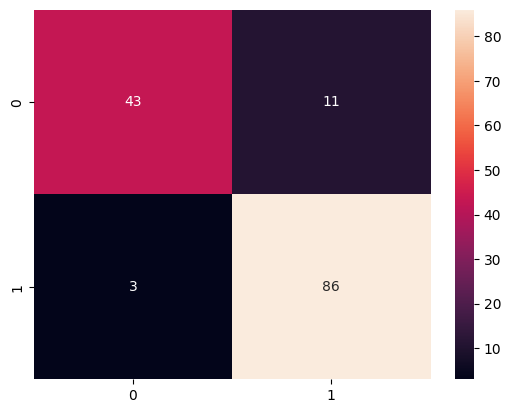

In [ ]:
sns.heatmap(matriz, annot=True);

-

Resultado do treinamento. Erros e Acertos

Em (0,1) temos que foram classificados errado quem não tinha cancer e foi dado como que tinha cancer.

Em (1,1) temos os que foram classificados corretamente tendo a acertividade que foi dados como sem cancer e o treinamento acertou.

Em (0,0) temos os que foram dados que tinha cancer e foi acertivo para resultados com cancer. Foi o os que o modelo acertou.

Em (1,0) temos os resultados que foram erros, colocando quem não tem cancer como resultado positivo para quem tem cancer.

-